Artificial Intelligence (Sun'iy Intellekt) - Mashinalarni inson kabi o'ylab qaror qabul qilishga undovchi intellect

Machine Learning - Mashinalarning to'g'ridan to'g'ri dasturlashlarsiz vazifalarni bajarish qobilyati

Deep Learning - Machine Learning bajarishi mumkin bo'lgan vazifalarni neyron tarmoglari yordamida bajarish



## **Deep Learning**

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
import fastai
fastai.__version__

'2.7.15'

In [ ]:
torch.__version__

'2.3.0+cu121'

path - bu biroz avval yaratib olgan Path Objectimiz ya'ni datasetimiz turgan manzil

get_image_files(path) - rasmlarni ko'rsatilgan manzildan oluvchi funksiya

valid_pct - validation uchun ajratib olingan ulush (0.2 bu umumiy datasetning 20%i validation uchun olib qo'yilmoqda degani).

seed - train jarayonida datalarning tartibi modelga aralash holatda keladi, bu esa modelni har gal har xil datalarda train qilinishiga olib kelishi mumkin, seed mana shu aralash tartibni doim bir xil ko'rinishda ushlab turishga xizmat qiladi

label_func - bu yerga biz labelga ajratuvchi funksiyamizni uzatamiz

item_tfms - rasmlarni shakllini tuzilshini o'zgartirish imkonini beruvchi va ularni tensorlar ko'rinishiga kelturuvchi funksiya

In [ ]:
# kutubxonlar
from fastai.vision.all import *
from ipywidgets import widgets

# data # datani yuklab olib uni zip fayldan extrakt qilish, agar yuklab olingan bo'lsa unda faqat zipdan extrakt qiladi
path = untar_data(URLs.PETS)/'images'

# labellovchi funksiya ->barcha mushuklarning rasmining bosh harflari katta harflarda
def is_cat(x): return x[0].isupper()

# datalarni yuklovchi (dataloaders)
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

# o'qitish (train)
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 38.8MB/s]


In [ ]:
# rasm yuklash uchun widget
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Mushukmi?: Car
Aniqlilik ehtimologi: 0.000


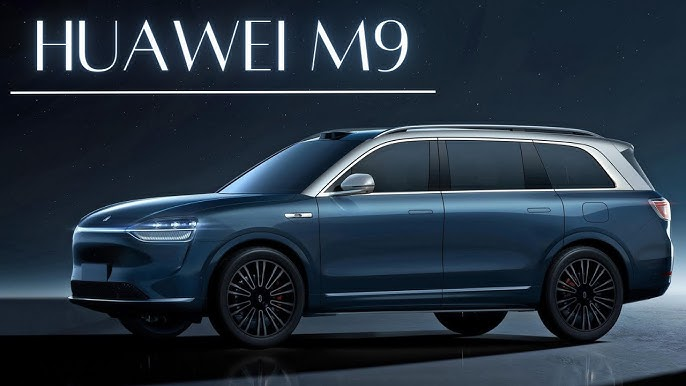

In [ ]:
img = PILImage.create(upload.data[-1]) # rasm
pred, _, prob = learn.predict(img) # bashorat qilish (predict)
print(f'Mushukmi?: {pred}')
print(f'Aniqlilik ehtimologi: {prob[1].item():.3f}')
img

## **DL images project**

In [ ]:
# kutubxonalarni yuklab olish
import torch

import fastai

# versiyalarini tekshirish
print(torch.__version__)
print(fastai.__version__)

2.3.0+cu121
2.7.15


In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

!cd OIDv4_ToolKit && pip install -r requirements.txt

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 41.20 MiB/s, done.
Resolving deltas: 100% (146/146), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1


In [ ]:
!cd OIDv4_ToolKit && python main.py -h

usage: main.py [-h] [--Dataset /path/to/OID/csv/] [-y]
               [--classes list of classes [list of classes ...]]
               [--type_csv 'train' or 'validation' or 'test' or 'all']
               [--sub Subset of human verified images or machine generated (h or m)]
               [--image_IsOccluded 1 or 0] [--image_IsTruncated 1 or 0] [--image_IsGroupOf 1 or 0]
               [--image_IsDepiction 1 or 0] [--image_IsInside 1 or 0]
               [--multiclasses 0 (default) or 1] [--n_threads [default 20]] [--noLabels]
               [--limit integer number]
               <command> 'downloader', 'visualizer' or 'ill_downloader'.

Open Image Dataset Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
                        'downloader', 'visualizer' or 'ill_downloader'.

options:
  -h, --help            show this help message and exit
  --Dataset /path/to/OID/csv/
                        Directory of the OID dataset folder
  -y, --yes

In [ ]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content/ --classes Car Airplane Boat --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 64836 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

'PosixPath' object is not iterable


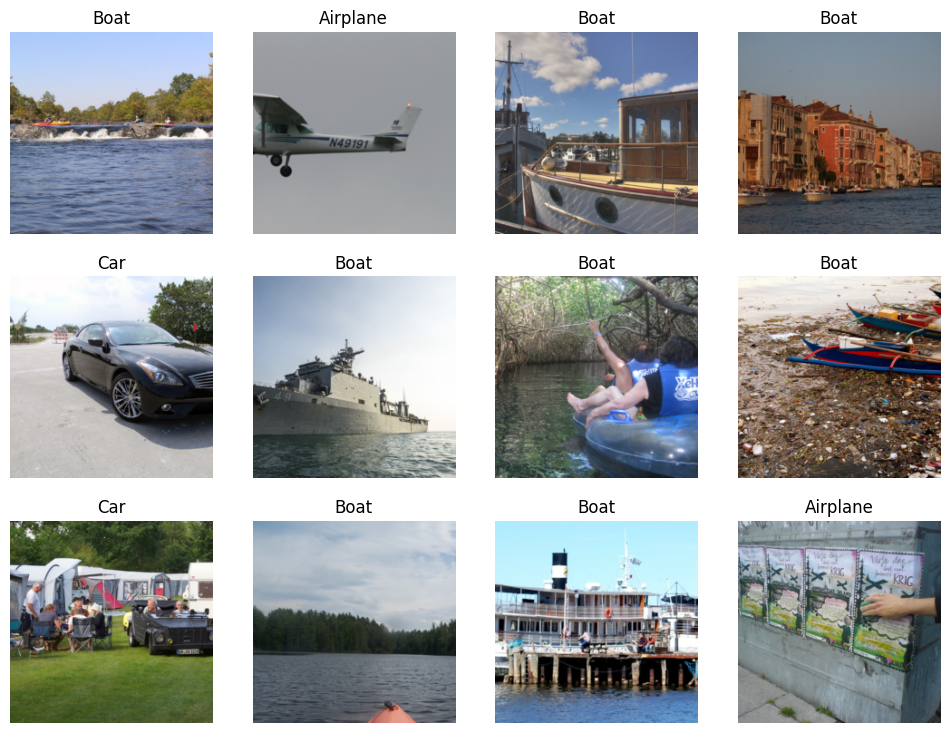

In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets

# path
path = Path('train')

path.ls()

fls = get_image_files(path)

failed = verify_images(path) # fail bo'lgan rasmlar

# datablock yaratish

transports = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

#DataLoader Yaratish

dls = transports.dataloaders(path)

# datasetni tekshirish

dls.train.show_batch(max_n=12, nrows=3)

In [ ]:
#training

learn = cnn_learner(dls, resnet34, metrics=accuracy)

learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 138MB/s]


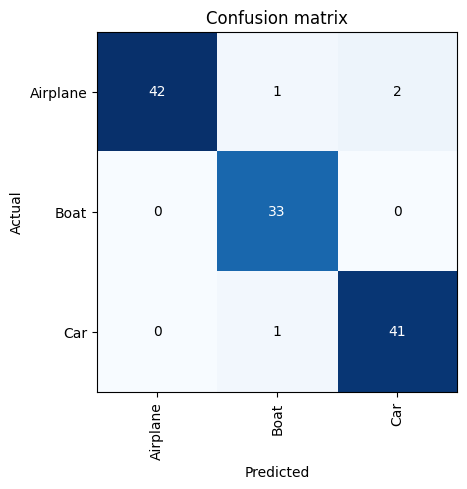

In [ ]:
# tekshirish

interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix()

Modelni rasm yuklab tekshirish

In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

predict?: Car
Aniqlilik ehtimologi: 0.9999262094497681


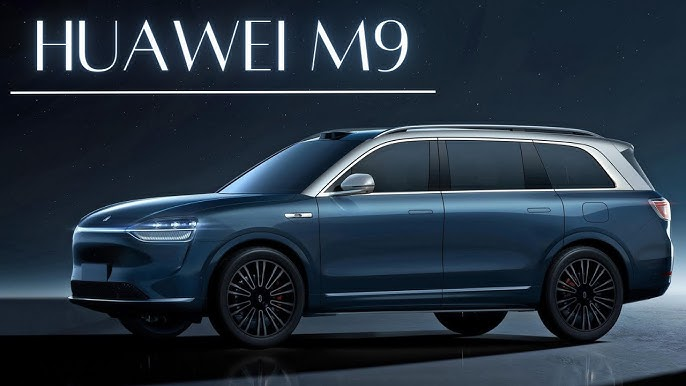

In [ ]:
img = PILImage.create(upload.data[-1]) # rasm
pred, pred_id, probs = learn.predict(img) # bashorat qilish (predict)
print(f'predict?: {pred}')
print(f'Aniqlilik ehtimologi: {probs[pred_id]}')
img

O'qitilgan modelni saqlab olish

In [ ]:
learn.export('transport_model.pkl')

Yuklangan modelni tekshirish

In [ ]:
model = load_learner('/content/transport_model.pkl')

In [ ]:
model.predict(img)

('Car', tensor(2), tensor([7.3715e-05, 9.2135e-08, 9.9993e-01]))

## Semantic  Segmentation

In [1]:
# kutubxonalarni yuklab olish
import torch

import fastai

# versiyalarini tekshirish
print(torch.__version__)
print(fastai.__version__)

2.3.0+cu121
2.7.15


O'zi yurar avtomabillar uchun juda ham muhim bo'lgan rasmdagi turli xil obyektlarni ajrata olish (semantic segmentation) texnologiyasini modelini qurib ko'ramiz. Ya'ni modelimiz rasmdagi turli xil obyeklarni ajratib ularni turli xil ranglarda ko'rsatadi.

In [2]:
from fastai.vision.all import *
import numpy as np

path = untar_data(URLs.CAMVID_TINY)


# label getter funksiya
def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}'

# dataloaders
dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames=get_image_files(path/'images'),
                                              label_func= label_getter,
                                              codes=np.loadtxt(path/'codes.txt', dtype=str))
#  fine-tuning
learn = unet_learner(dls, resnet34)
learn.fine_tune(12)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 160MB/s]


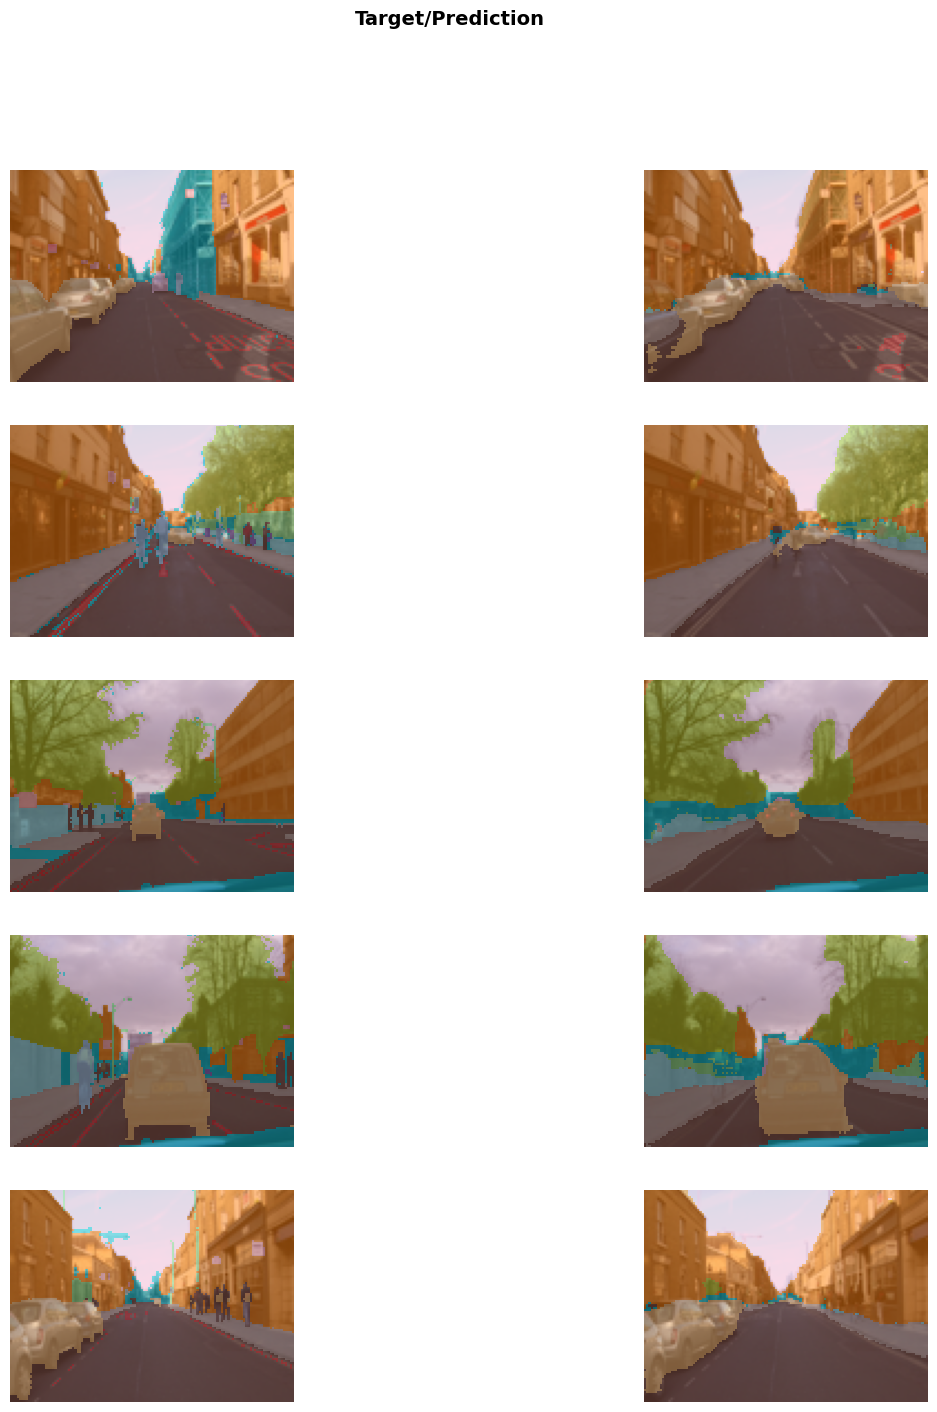

In [3]:
learn.show_results(max_n=5, figsize=(15, 16))

## **Natural Language Processing (NLP)**

Navbatdagi misollimiz bu NLP(Natural Language Processing)ga yo'naltirilgan. Bu soha hozirda juda jadal rivojalanib borayotgan soha hisoblanadi. NLP o'z ichiga matnlar ishlab chiqa olish (generate), izohlarni tahlil qilish, gapdagi so'zlarni sinflash va h.k amallarni qamrab oladi.


Modelimiz ham IMDb Review datasetda berilgan izohlardan kelib chiqgan holda, u izohning ijobiy(positive) yoki salbiy(negative) izoh ekanligini aniqlay oladi.

In [4]:
# kutubxonalarni yuklab olish
import torch
import fastai

# versiyalarini tekshirish
print(torch.__version__)
print(fastai.__version__)

2.3.0+cu121
2.7.15


In [5]:
from fastai.text.all import *

# dataset
path = untar_data(URLs.IMDB)

# dataloaders
dls = TextDataLoaders.from_folder(path, train='train', valid='test')

# fine-tune
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(2, 0.01)

In [6]:
learn.predict("I hate that movie")

('neg', tensor(0), tensor([0.5982, 0.4018]))

## **Tabular data va Tabular model**

Tabular data: Tuzilishi jadval ko'rinishida bo'lgan ma'lumotlarni tabular data deb aytish mumkin.

Tabular model: Bu jadvalning bir ustunini boshqa ustunidagi ma'lumotlarga tayanib o'qitilgan(trained) modelni tushinish mumkin.

In [7]:
# https://jovian.com/outlink?url=https%3A%2F%2Farchive.ics.uci.edu%2Fml%2Fdatasets%2Fadult dataset

from fastai.tabular.all import *

# dataset
path = untar_data(URLs.ADULT_SAMPLE)

# dataloaders
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, bs=64, y_names='salary', skipinitialspace=False,
                                  cat_names=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'],
                                  cont_names= ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'],
                                  procs = [Categorify, FillMissing, Normalize])

# o'qitish (train)
learn = tabular_learner(dls, metrics=accuracy)
# fit_one_cycle --> bu fine_tune dan farqli o'laroq, yangidan arxitektura tuzib o'qitadi
learn.fit_one_cycle(4)

In [8]:
import pandas as pd

# loading data set into dataframe
df = pd.read_csv(path/'adult.csv')
df.head()

age          workclass  fnlwgt     education  education-num  \
0   49            Private  101320    Assoc-acdm           12.0   
1   44            Private  236746       Masters           14.0   
2   38            Private   96185       HS-grad            NaN   
3   38       Self-emp-inc  112847   Prof-school           15.0   
4   42   Self-emp-not-inc   82297       7th-8th            NaN   

        marital-status        occupation    relationship                 race  \
0   Married-civ-spouse               NaN            Wife                White   
1             Divorced   Exec-managerial   Not-in-family                White   
2             Divorced               NaN       Unmarried                Black   
3   Married-civ-spouse    Prof-specialty         Husband   Asian-Pac-Islander   
4   Married-civ-spouse     Other-service            Wife                Black   

       sex  capital-gain  capital-loss  hours-per-week  native-country salary  
0   Female             0          1902              40   United-States  >=50k  
1     Male         10520             0              45   United-States  >=50k  
2   Female             0             0              32   United-States   <50k  
3     Male             0             0              40   United-States  >=50k  
4   Female             0             0              50   United-States   <50k

In [9]:
# test
row, pred, probs = learn.predict(df.iloc[4])
pred.item(), probs

(0, tensor([0.8262, 0.1738]))

Tabular model yordamida **Loan decision**

In [13]:
# https://jovian.com/outlink?url=https%3A%2F%2Fwww.kaggle.com%2Fyasserh%2Floan-default-dataset

from fastai.tabular.all import *


# path
path = Path('.')


# dataloaders
dls = TabularDataLoaders.from_csv(path/'data/Loan_Default.csv', path=path, bs=64, y_names='Status',
                                   cat_names=['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'interest_only', 'lump_sum_payment', 'co-applicant_credit_type', 'submission_of_application', 'Region'],
                                   cont_names=['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',  'LTV', 'dtir1'],
                                   procs=[Categorify, FillMissing, Normalize])
# train
learn = tabular_learner(dls, metrics=accuracy)

learn.fit_one_cycle(2)

--2024-05-25 18:50:07--  https://www.kaggle.com/yasserh/loan-default-dataset/download
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fyasserh%2Floan-default-dataset%3Fresource%3Ddownload [following]
--2024-05-25 18:50:07--  https://www.kaggle.com/account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fyasserh%2Floan-default-dataset%3Fresource%3Ddownload
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Loan_Default.csv’

Loan_Default.csv        [ <=>                ]   5.09K  --.-KB/s    in 0s      

2024-05-25 18:50:07 (16.5 MB/s) - ‘Loan_Default.csv’ saved [521

FileNotFoundError: [Errno 2] No such file or directory: 'data/Loan_Default.csv'

In [14]:
learn.show_results(max_n=64)